# Initialization of GPU_Utility libraries


Code Contributed by Siddhant Mahajan

[Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [1]:
%load_ext cudf.pandas

Import required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from cuml.model_selection import train_test_split

from cuml.svm import LinearSVC, SVC
from cuml.ensemble import RandomForestClassifier
from cuml.linear_model import LogisticRegression

from cuml.metrics.accuracy import accuracy_score
from cuml.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Set required environment variables

In [3]:
pd.options.display.max_columns = None

Data loading

In [4]:
df= pd.read_csv('employee_attrition.csv')

get_mempolicy: Function not implemented


In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 no

# Data Cleaning

Start by converting textual data into numeric equivalent

In [7]:
# attrition
AttritionVal = {}
cnt = 0
for i in df['Attrition'].unique():
    AttritionVal[i] = cnt
    cnt += 1

#businesstravel
Businesstravel = {}
cnt = 0
for i in df['BusinessTravel'].unique():
    Businesstravel[i] = cnt
    cnt += 1

# department
departmentval = {}
cnt = 0
for i in df['Department'].unique():
    departmentval[i] = cnt
    cnt += 1

# educationfield
edfieldval = {}
cnt = 0
for i in df['EducationField'].unique():
    edfieldval[i] = cnt
    cnt += 1

# gender
genderval = {}
cnt = 0
for i in df['Gender'].unique():
    genderval[i] = cnt
    cnt += 1

# jobrole
jobroleval = {}
cnt = 0
for i in df['JobRole'].unique():
    jobroleval[i] = cnt
    cnt += 1

#marital status
Maritalval = {}
cnt = 0
for i in df['MaritalStatus'].unique():
    Maritalval[i] = cnt
    cnt += 1

# overtime
overtimeval = {}
cnt = 0
for i in df['OverTime'].unique():
    overtimeval[i] = cnt
    cnt += 1


In [8]:
# replace all
df.Attrition = df.Attrition.replace(AttritionVal)
df.BusinessTravel = df.BusinessTravel.replace(Businesstravel)
df.Department = df.Department.replace(departmentval)
df.EducationField = df.EducationField.replace(edfieldval)
df.Gender = df.Gender.replace(genderval)
df.JobRole = df.JobRole.replace(jobroleval)
df.MaritalStatus = df.MaritalStatus.replace(Maritalval)
df.OverTime = df.OverTime.replace(overtimeval)


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cudf/pandas/fast_slow_proxy.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return fn(*args, **kwargs)
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cudf/pandas/fast_slow_proxy.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return fn(*args, **kwargs)
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cudf/pandas/fast_slow_proxy.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and

In [9]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-nul

We have successfully converted major columns to numeic, while also keeping their mappings intact.
Now, we will remove redundant columns

In [10]:
print("EmployeeCount:",df['EmployeeCount'].unique())
print("Over18:",df['Over18'].unique())
print("StandardHours:",df['StandardHours'].unique())

# drop the data
df.drop(columns=['EmployeeCount','Over18','StandardHours'], axis=1,inplace=True)

EmployeeCount: [1]
Over18: ['Y']
StandardHours: [80]


In [11]:
# employee number is not any impact factor column
df.drop(columns=['EmployeeNumber'], axis=1, inplace=True)

Correlation heatmap analysis

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='PuBu',text_color_threshold=0.408)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,-0.024751,0.010661,0.031882,-0.001686,0.208034,-0.007192,0.010146,-0.036311,0.024287,0.029820,0.509604,0.159715,-0.004892,0.095029,0.497855,0.028051,0.299635,-0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.000074,0.056652,0.063991,-0.077924,0.031373,-0.075437,0.103369,-0.029453,0.006846,0.130016,0.169105,0.027930,0.103481,0.162070,0.159840,-0.015170,-0.043494,0.246118,0.013478,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,-0.024751,0.000074,1.000000,0.004086,-0.009044,0.024469,-0.000757,-0.017799,-0.004174,0.032981,-0.026528,-0.039062,-0.019311,-0.028664,0.033962,0.024001,-0.034319,0.014107,-0.020875,0.016543,0.029377,0.026341,0.035986,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,0.056652,0.004086,1.000000,-0.007109,-0.004985,-0.016806,-0.015942,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.002507,0.030571,0.069586,0.007707,-0.032182,0.038153,-0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,0.063991,-0.009044,-0.007109,1.000000,-0.017225,-0.007996,-0.057499,0.019395,0.041583,0.004144,0.024586,-0.101963,0.425036,-0.021001,0.056073,-0.053130,-0.023642,0.035882,0.007481,0.007840,0.024604,0.022414,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,-0.077924,0.024469,-0.004985,-0.017225,1.000000,0.021042,0.020004,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.043595,-0.003669,0.014437,-0.017014,0.027473,-0.029251,-0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,-0.000757,-0.016806,-0.007996,0.021042,1.000000,-0.002687,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.019223,-0.011296,-0.004053,0.094961,-0.026084,0.126317,0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.007192,-0.075437,-0.017799,-0.015942,-0.057499,0.020004,-0.002687,1.000000,0.015744,-0.003881,-0.023901,-0.005582,0.009671,0.044584,-0.055367,0.018331,0.008189,-0.013488,0.005448,-0.002706,-0.037735,-0.027071,0.022723,0.020179,-0.002329,0.014553,0.033896,0.003061,-0.007728,0.004327,-0.001829
EnvironmentSatisfaction,0.010146,0.103369,-0.004174,0.018355,0.019395,-0.016075,-0.027128,0.015744,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.010129,-0.006784,0.003593,-0.006259,0.037600,0.012594,-0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,-0.029453,0.032981,-0.011716,0.041583,-0.001851,-0.016547,-0.003881,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.014824,0.033252,0.047183,-0.031858,-0.041482,-0.039147,0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


From the correlation table we see that monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. We will be using monthly income in later analysis 

In [13]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

More conclusions:
 * Job level and working years are highly correlated
 * working years and monthly income are correlated
 * performance and salary hike are related

# basic EDA

Attrition Legend:
0  :  Yes
1  :  No


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cudf/core/indexed_frame.py:3547: UserWarning: GPU-accelerated mergesort is currently not supported, defaulting to quicksort.
  warnings.warn(


<Axes: xlabel='Attrition', ylabel='count'>

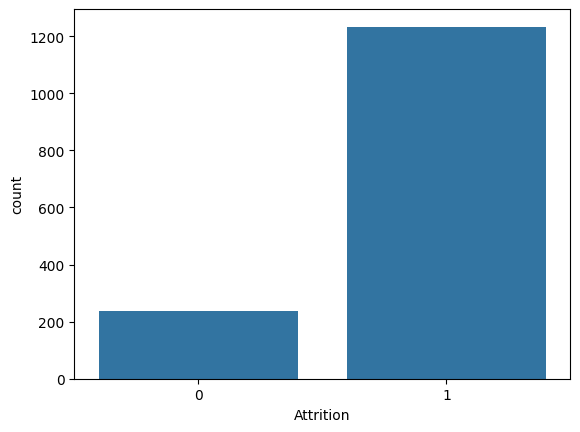

In [14]:
# attrition rate
print("Attrition Legend:")
for i in range(len(AttritionVal)):
    print(i, " : ", list(AttritionVal.keys())[i])

sns.countplot(x='Attrition', data=df)

Attrition Legend:
0  :  Yes
1  :  No
gender Legend:
0  :  Female
1  :  Male


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cudf/core/indexed_frame.py:3547: UserWarning: GPU-accelerated mergesort is currently not supported, defaulting to quicksort.
  warnings.warn(


<Axes: xlabel='Gender', ylabel='count'>

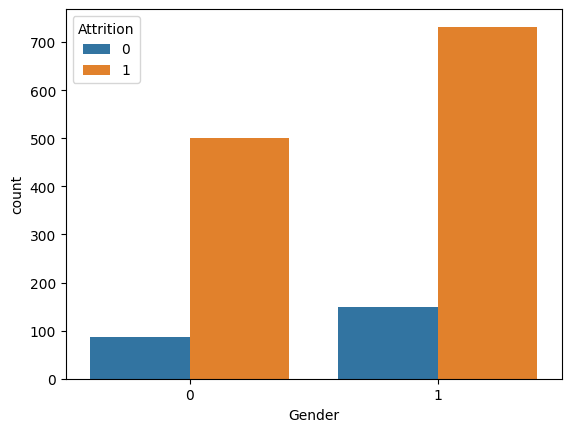

In [15]:
print("Attrition Legend:")
for i in range(len(AttritionVal)):
    print(i, " : ", list(AttritionVal.keys())[i])

print("gender Legend:")
for i in range(len(genderval)):
    print(i, " : ", list(genderval.keys())[i])


sns.countplot(x = 'Gender', hue='Attrition', data=df)

males have more attrition rate

Attrition Legend:
0  :  Yes
1  :  No
Martial Status Legend:
0  :  Single
1  :  Married
2  :  Divorced


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cudf/core/indexed_frame.py:3547: UserWarning: GPU-accelerated mergesort is currently not supported, defaulting to quicksort.
  warnings.warn(


<Axes: xlabel='MaritalStatus', ylabel='count'>

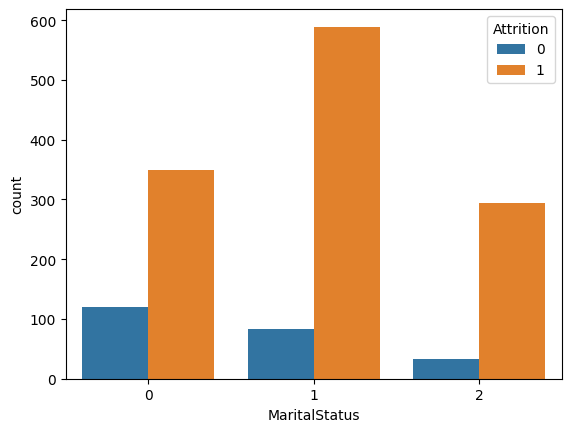

In [16]:
print("Attrition Legend:")
for i in range(len(AttritionVal)):
    print(i, " : ", list(AttritionVal.keys())[i])

print("Martial Status Legend:")
for i in range(len(Maritalval)):
    print(i, " : ", list(Maritalval.keys())[i])

sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)

single people have more attrition rate

Attrition Legend:
0  :  Yes
1  :  No
Department Legend:
0  :  Sales
1  :  Research & Development
2  :  Human Resources


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cudf/core/indexed_frame.py:3547: UserWarning: GPU-accelerated mergesort is currently not supported, defaulting to quicksort.
  warnings.warn(


<Axes: xlabel='Department', ylabel='count'>

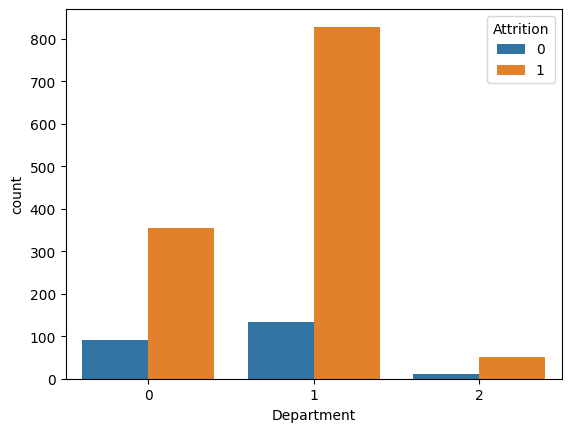

In [17]:
print("Attrition Legend:")
for i in range(len(AttritionVal)):
    print(i, " : ", list(AttritionVal.keys())[i])

print("Department Legend:")
for i in range(len(departmentval)):
    print(i, " : ", list(departmentval.keys())[i])

sns.countplot(x= "Department", hue = 'Attrition', data = df)

REsearch and development have more attrition

# Classification using ML

For the classification, we shall make use of GPU CuDA runtimes and libraries for applied machine learning, namely RAPIDS.
These libraries allow the usage of GPU for matrix calculations, boosting the speeds. With help of highly developed GPU architecture, the floating point precision can also be improved

In [18]:
df = df.astype(np.float64)

In [19]:
X = df.drop("Attrition", axis=1)
Y = df.Attrition

featurecol = X.columns.values.tolist()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,shuffle=True, random_state=17)

Basic model convergence checking

In [21]:
rndmf = RandomForestClassifier()
rndmf.fit(X_train,y_train)

svm = SVC()
svm.fit(X_train,y_train)

logres = LogisticRegression()
logres.fit(X_train,y_train)

rnpred = rndmf.predict(X_test)
svmpred = svm.predict(X_test)
logrespred = logres.predict(X_test)

print("RandomForest has accuracy of: ", accuracy_score(rnpred,y_test))
print("SVM has accuracy of: ", accuracy_score(svmpred,y_test))
print("LogisticRegression has accuracy of: ", accuracy_score(logrespred,y_test))

/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


[W] [13:45:48.337254] Warning: could not fill working set, found only 672 elements
[W] [13:45:49.025984] Warning: could not fill working set, found only 864 elements
[W] [13:45:49.092315] Warning: could not fill working set, found only 829 elements
[W] [13:45:49.124808] Warning: could not fill working set, found only 863 elements
[W] [13:45:54.353744] L-BFGS: max iterations reached
[W] [13:45:54.354233] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
RandomForest has accuracy of:  0.8548752665519714
SVM has accuracy of:  0.8253968358039856
LogisticRegression has accuracy of:  0.8662131428718567


# Feature Selection and Elimination

In [22]:
xtrainrfe = X_train.to_numpy()
xtestrfe = X_test.to_numpy()
ytrainrfe = y_train.to_numpy()
ytestrfe = y_test.to_numpy()

recursive feature elimination on logistic regression

In [23]:
logres = LogisticRegression(max_iter=5243)
gbb = GradientBoostingClassifier()
adb = AdaBoostClassifier()
xgb = XGBClassifier(device="cuda",tree_method="hist")
svm = LinearSVC()
xgrb = XGBRFClassifier(device="cuda",tree_method="hist")

storedict = {}

models = [logres, gbb, adb,xgb,xgrb,svm]

In [24]:
def model_iter_trainer_rfc(model, storedict):
    best_features_count = 0
    best_prediction_percent = 0.0
    best_support_features = ""

    for i in range(10, 45):
        rfe = RFE(model, n_features_to_select=i)
        rfe.fit(xtrainrfe,ytrainrfe)
        pred = rfe.predict(xtestrfe)
        acc = accuracy_score(pred,ytestrfe)
        
        if acc>best_prediction_percent:
            best_prediction_percent = acc
            best_features_count = i
            best_support_features = np.array(rfe.support_)

    print("\n\n")
    print(model," has improved accuracy to ",best_prediction_percent," with selections ", best_features_count)
    print(np.array(featurecol)[best_support_features])
    best_support_features = np.array(featurecol)[best_support_features]
    
    storedict[model] = best_support_features

In [25]:
for i in models:
    model_iter_trainer_rfc(i,storedict)

/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=28 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=29 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=30 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=31 > n_features=27. There will be no feature selection and all features will be kep




LogisticRegression()  has improved accuracy to  0.8866212964057922  with selections  20
['BusinessTravel' 'Department' 'EducationField' 'EnvironmentSatisfaction'
 'Gender' 'JobInvolvement' 'JobLevel' 'JobSatisfaction' 'MaritalStatus'
 'NumCompaniesWorked' 'OverTime' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager']


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=28 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=29 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=30 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=31 > n_features=27. There will be no feature selection and all features will be kep




GradientBoostingClassifier()  has improved accuracy to  0.8684807419776917  with selections  17
['Age' 'DistanceFromHome' 'EducationField' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobRole' 'JobSatisfaction' 'MonthlyIncome'
 'NumCompaniesWorked' 'OverTime' 'RelationshipSatisfaction'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'WorkLifeBalance' 'YearsAtCompany' 'YearsInCurrentRole']


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 




AdaBoostClassifier()  has improved accuracy to  0.8934240341186523  with selections  18
['Age' 'BusinessTravel' 'DistanceFromHome' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked'
 'OverTime' 'PercentSalaryHike' 'RelationshipSatisfaction'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'WorkLifeBalance' 'YearsAtCompany' 'YearsSinceLastPromotion'
 'YearsWithCurrManager']


/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:53:23] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=28 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=29 >




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)  has improved accuracy to  0.8820861577987671  with selections  21
['Age' 'BusinessTravel' 'Department' 'DistanceFromHome' 'EducationField'
 'EnvironmentSatisfaction' 'JobInvolvement' 'JobLevel' 'JobRole'
 'JobSatisfaction' 'MonthlyIncom

/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=28 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=29 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=30 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=31 > n_features=27. There will be no feature selection and all features will be kep




XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device='cuda',
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)  has improved accuracy to  0.8548752665519714  with selections  12
['Department' 'DistanceFromHome' 'JobInvolvement' 'JobLevel' 'JobRole'
 'MaritalStatus' 'MonthlyIncome' 'OverTime' 'RelationshipSa

/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=28 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=29 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=30 > n_features=27. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=31 > n_features=27. There will be no feature selection and all features will be kep




LinearSVC()  has improved accuracy to  0.8820861577987671  with selections  25
['Age' 'BusinessTravel' 'Department' 'DistanceFromHome' 'EducationField'
 'EnvironmentSatisfaction' 'Gender' 'JobInvolvement' 'JobLevel' 'JobRole'
 'JobSatisfaction' 'MaritalStatus' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'WorkLifeBalance' 'YearsAtCompany' 'YearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [26]:
storedict

{LogisticRegression(): array(['BusinessTravel', 'Department', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
        'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'], dtype='<U24'),
 GradientBoostingClassifier(): array(['Age', 'DistanceFromHome', 'EducationField',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole'], dtype='<U24'),
 AdaBoostClassifier(): array(['Age', 'BusinessTravel', 'DistanceFromHome',
        'Environmen

In [27]:
storedict.keys()

dict_keys([LogisticRegression(), GradientBoostingClassifier(), AdaBoostClassifier(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device='cuda',
             

# Voting Classifier

In [49]:
df = df.astype(np.float64)
X = df.drop("Attrition", axis=1)
Y = df.Attrition

featurecol = X.columns.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,shuffle=True, random_state=17)

xtrainrfe = X_train.to_numpy()
xtestrfe = X_test.to_numpy()
ytrainrfe = y_train.to_numpy()
ytestrfe = y_test.to_numpy()


ytestrfe = np.asarray(ytestrfe,np.int64)

In [50]:
models1 = [('logres',LogisticRegression(max_iter=5243)), ('gbb',GradientBoostingClassifier()), ('adb',AdaBoostClassifier()), ('xgb',XGBClassifier(device="cuda", tree_method="hist")), ('xgrb',XGBRFClassifier(device="cuda", tree_method="hist")), ('rndm',RandomForestClassifier())]
models2 = [('logres',LogisticRegression(max_iter=5243)), ('gbb',GradientBoostingClassifier()), ('adb',AdaBoostClassifier()), ('xgb',XGBClassifier(device="cuda", tree_method="hist")), ('xgrb',XGBRFClassifier(device="cuda", tree_method="hist")), ('rndm',RandomForestClassifier())]

1. Hard Voting

In [51]:
vothrd = VotingClassifier(estimators=models1, voting='hard')
vothrd.fit(xtrainrfe,ytrainrfe)

/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


VotingClassifier(estimators=[('logres', LogisticRegression()),
                             ('gbb', GradientBoostingClassifier()),
                             ('adb', AdaBoostClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_...
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              random_state=None, reg_alpha=None, ...)),
                             ('rndm', RandomForestClassifier())])

In [59]:
predhrd = vothrd.predict(xtestrfe)
predhrd = np.asarray(predhrd, dtype=np.int64)
print("Accuracy of HardVoting model: ",accuracy_score(ytestrfe,predhrd))
print("Confusion Matrix: ")
print(confusion_matrix(predhrd,ytestrfe))

print(classification_report(predhrd,ytestrfe))

Accuracy of HardVoting model:  0.875283420085907
Confusion Matrix: 
[[ 28   6]
 [ 49 358]]
              precision    recall  f1-score   support

           0       0.36      0.82      0.50        34
           1       0.98      0.88      0.93       407

    accuracy                           0.88       441
   macro avg       0.67      0.85      0.72       441
weighted avg       0.94      0.88      0.90       441



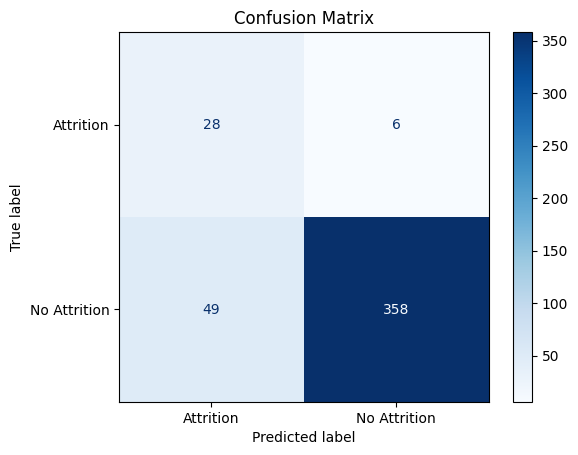

In [71]:
cm = confusion_matrix(predhrd, ytestrfe)

cm = cm.get()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Attrition', 'No Attrition'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

2. Soft Voting

In [54]:
vot = VotingClassifier(estimators=models2, voting='soft')
vot.fit(xtrainrfe,ytrainrfe)

/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sidthechillguy/miniconda3/envs/rapids/lib/python3.12/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


VotingClassifier(estimators=[('logres', LogisticRegression()),
                             ('gbb', GradientBoostingClassifier()),
                             ('adb', AdaBoostClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_...
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              random_state=None, reg_alpha=None, ...)),
                             ('rndm', RandomForestClassifier())],
                 voting='soft')

In [69]:
pred = vot.predict(xtestrfe)

In [70]:
pred = np.asarray(pred, dtype=np.int64)

print("Accuracy of the SoftVoting model: ",accuracy_score(ytestrfe,pred))
print("Confusion Matrix:")
print(confusion_matrix(pred,ytestrfe))
print(classification_report(ytestrfe,pred))

Accuracy of the SoftVoting model:  0.8730158805847168
Confusion Matrix:
[[ 26   5]
 [ 51 359]]
              precision    recall  f1-score   support

           0       0.84      0.34      0.48        77
           1       0.88      0.99      0.93       364

    accuracy                           0.87       441
   macro avg       0.86      0.66      0.70       441
weighted avg       0.87      0.87      0.85       441



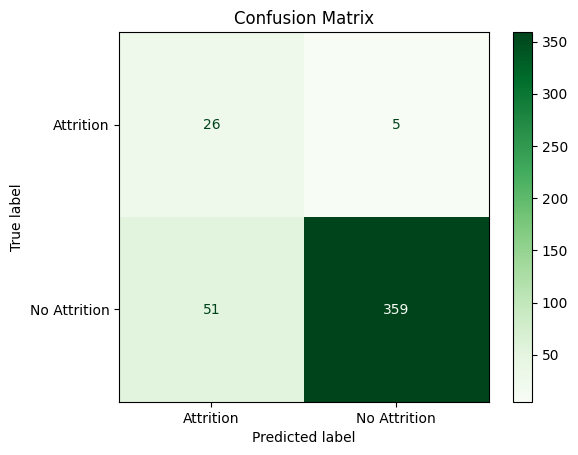

In [61]:
cm = confusion_matrix(pred, ytestrfe)

cm = cm.get()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Attrition', 'No Attrition'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()